## CLICK STREAM ANALYTICS PROJECT PART II

•	This second part of Click Stream Analytics Project will continue using the same data
(HotelClickStream.xls) and interpret the results. This dataset includes clickstream data of
online transactions for hotel booking in year 2011. Appendix includes the detailed
description for the variables.
<br>
•	You will need the two new variables you created in part I, i.e. Ref_D and LOG_PRICE
<br>
•	Please follow the instructions very carefully! Please do the following analyses and answer
the corresponding questions. Please copy/summarize your key results for each question
to a word file along with your answers to produce the final report. Your submission
will include the final report and your codes in the file format of jupyter notebook.


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

Load the HotelClickStream dataset into a pandas dataframe names as df

In [2]:
df = pd.read_excel("HotelClickStream.xls",delimiter=",")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 16 columns):
ID                   3749 non-null int64
DOMAIN_ID            3749 non-null uint64
MACHINE_ID           3749 non-null int64
SITE_SESSION_ID      3749 non-null int64
TRANS_FREQ           3749 non-null int64
DOMAIN_NAME          3749 non-null object
DIRECTP_D            3749 non-null int64
PROD_NAME            3749 non-null object
PROD_QTY             3749 non-null int64
PROD_TOTPRICE        3749 non-null float64
REF_DOMAIN_NAME      1687 non-null object
DURATION             3749 non-null float64
PAGES_VIEWED         3749 non-null int64
HOUSEHOLD_SIZE       3749 non-null int64
CHILDREN_D           3749 non-null int64
CONNECTIONSPEED_D    3749 non-null int64
dtypes: float64(2), int64(10), object(3), uint64(1)
memory usage: 468.7+ KB


In [4]:
df.columns

Index(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID', 'TRANS_FREQ',
       'DOMAIN_NAME', 'DIRECTP_D', 'PROD_NAME', 'PROD_QTY', 'PROD_TOTPRICE',
       'REF_DOMAIN_NAME', 'DURATION', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D'],
      dtype='object')

In [5]:
df.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1


## First creating the following 2 additional variables into dataset

### a) REF_D (create a dummy variable indicating whether the transaction was referenced from other website, if not, the final booking website was directly accessed. If no information provided for the variable REF_DOMAIN_NAME, REF_D = 0; otherwise REF_D = 1)

In [6]:
df.loc[pd.isna(df.REF_DOMAIN_NAME),'REF_D']=0
df.loc[pd.notna(df.REF_DOMAIN_NAME),'REF_D']=1

### b) LOG_PRICE (take the log transformation of the variable PROD_TOTPRICE )

In [7]:
df.PROD_TOTPRICE.min()

0.0

In [8]:
df['LOG_PRICE']=np.log1p(df.PROD_TOTPRICE)

In [9]:
df.columns

Index(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID', 'TRANS_FREQ',
       'DOMAIN_NAME', 'DIRECTP_D', 'PROD_NAME', 'PROD_QTY', 'PROD_TOTPRICE',
       'REF_DOMAIN_NAME', 'DURATION', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D', 'REF_D', 'LOG_PRICE'],
      dtype='object')

In [10]:
df.head(5)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0.0,7.954386
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1.0,7.786527
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1.0,7.682022
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0.0,7.580547
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1.0,7.494430



## • Let’s analyze the distribution of continuous independent variables w.r.t Dependent varible 

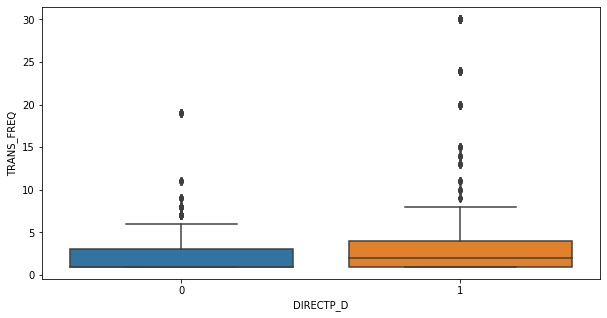

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x="DIRECTP_D",y="TRANS_FREQ",data= df)


### From the above plots, we can infer  that the TRANS_FREQ  is high for transaction which incurred directly from a hotel website (1)
-------------------------------------------------------------------------------------------------------------------------------

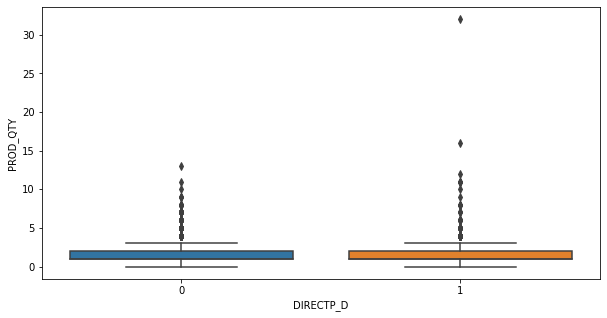

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x="DIRECTP_D",y="PROD_QTY",data= df)


### From the above plots, we can infer that PROD_QTY doesn't make difference in the transactions which incurred directly from a hotel website (1) or other third_party travel website (0).
-------------------------------------------------------------------------------------------------------------------------------

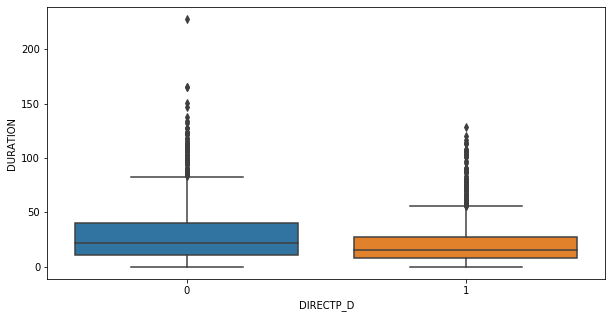

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x="DIRECTP_D",y="DURATION",data= df)



-------------------------------------------------------------------------------------------------------------------------------


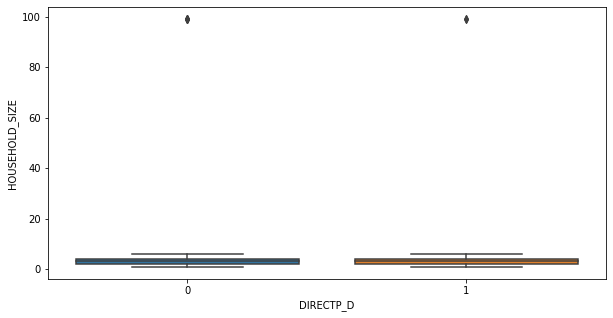

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x="DIRECTP_D",y="HOUSEHOLD_SIZE",data= df)

### From the above plots, we can infer that HOUSEHOLD_SIZE doesn't make difference in the transactions which incurred directly from a hotel website (1) or other third_party travel website (0).

------------------------------------------------------------------------------------------------------------------------------

## • For categorical independent variables, we can analyze the frequency of each category w.r.t. the dependent variable

In [15]:
pd.crosstab(df.DIRECTP_D,df.CHILDREN_D)


CHILDREN_D,0,1
DIRECTP_D,,
0,791,1153
1,694,1111


In [16]:
pd.crosstab(df.DIRECTP_D,df.CONNECTIONSPEED_D)

CONNECTIONSPEED_D,0,1
DIRECTP_D,,
0,17,1927
1,12,1793


-------------------------------------------------------------------------------------------------------------------------------
### 1. Please use the Binary Outcome (Logistic/Logit) regression technique to answer the question on “what are the factors that influence people’s decision on whether to book directly on a hotel website or from other third party website?”

### a)  Please use DIRECT_D as your Dependent Variable (DV); and REF_D, LOG_PRICE,TRANS_FREQ, DURATION, HOUSEHOLD_SIZE, CHILDREN_D, and CONNECTIONSPEED_D as your Independent Variables (IV).


# Start to do Logit regression model

### Step 1: Specify model (Don't forget to add constant)
Specify dependent variable: DIRECTP_D 

Specify independent variables:  REF_D, LOG_PRICE, TRANS_FREQ, DURATION, HOUSEHOLD_SIZE, CHILDREN_D, and CONNECTIONSPEED_D

In [17]:
indepvar=sm.add_constant(df[['REF_D','LOG_PRICE','TRANS_FREQ','DURATION','HOUSEHOLD_SIZE','CHILDREN_D','CONNECTIONSPEED_D']])

C:\Users\monik\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


We need intercept, unless we have a strong evidence for non-intercept

### Step 2: fit data into the model

In [18]:
Logit_mod=sm.Logit(df.DIRECTP_D,indepvar)

In [19]:
Logit_res=Logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.643629
         Iterations 6


### Step 3: print out result summary

In [20]:
print(Logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              DIRECTP_D   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3741
Method:                           MLE   Df Model:                            7
Date:                Wed, 15 Apr 2020   Pseudo R-squ.:                 0.07052
Time:                        15:01:22   Log-Likelihood:                -2413.0
converged:                       True   LL-Null:                       -2596.0
Covariance Type:            nonrobust   LLR p-value:                 4.323e-75
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4457      0.407     -1.095      0.273      -1.243       0.352
REF_D                 0.7364      0.070     10.571      0.000       0.600       0.873
LOG_PRICE             0.

### (b) Please report and interpret your (Logistic/Logit) regression results, which should include the interpretation of each of the regression coefficients.

Please have a look on Word Document for the explanation of this question. 

### c) Given the regression results, your interpretation, and your experience/research on internet shopping, what kind of improvement would you make on this model? e.g. IVs to be removed or new IVs to be added? Or even other regression methodologies. This question is designed to motivate your self-exploration beyond lecture/tutorial coverage.

In [21]:
df.columns

Index(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID', 'TRANS_FREQ',
       'DOMAIN_NAME', 'DIRECTP_D', 'PROD_NAME', 'PROD_QTY', 'PROD_TOTPRICE',
       'REF_DOMAIN_NAME', 'DURATION', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D', 'REF_D', 'LOG_PRICE'],
      dtype='object')

### To improve the above model, I choose the following independent variables REF_D, TRANS_FREQ, PROD_QTY ,DURATION ,PAGES_VIEWED ,CHILDREN_D

#### Below are the observations/reasons for choosing these independent variables. 
 
 • We have created dummy variable as REF_D for REF_DOMAIN_NAME. I infer that REF_D which shows the referring website name through which the final purchase website was reached has high impact on DIRECTP_D.

 • 	I would like to add TRANS_FREQ variable because if there are high number of TRANS_FREQ we can say that customers are frequently booking the hotel. There is something called Hotel loyalty programs which is membership-only programs that almost every major hotel chain offers to all of their guests. These programs offer a number of benefits for their members and are completely free to join. Hotels offer these programs to encourage their guests to book direct instead of using third party booking sites. So many customers who stays at hotel frequently usually for work/ business purpose are member of these loyalty program to take advantages of cheaper rates, free cancellation, receive additional perks etc. and they end up using hotel website for bookings.  
 
 •	I would like to remove HOUSEHOLD_SIZE, CONNECTIONSPEED_D from the above model because to my understanding and research total number of people in the household and whether the household has any good internet Connection speed or not are not significantly correlated with DIRECTP_D.
 
•  	PAGES_VIEWED should be one of the independent variables for DIRECTP_D because on scientific level, there’s some web-browsing psychology at work here. Having a lot of relevant quality content on your website means visitors are likely to view a greater number of pages on your website, which means they’re also likely to want to do business with you and book a room though hotel website. 

 •	DURATION is one of the key metrics, which is correlated with DIRECTP_D. People want to get the information they are looking in the website fast and easy so that they will find relevant results from which he/she will make a choice. 
 
 •	 CHILDREN_D variable is also important, because user who have children always prefer the hassle free stay and child-friendly amenities and benefits, they trust more on hotel websites for direct booking. 



### Start to do Logit regression model with new independent varible 

In [38]:
indepvar=sm.add_constant(df[['REF_D','TRANS_FREQ','PROD_QTY','DURATION','PAGES_VIEWED','CHILDREN_D']])

In [39]:
Logit_mod_new=sm.Logit(df.DIRECTP_D,indepvar)

In [40]:
Logit_res_new=Logit_mod_new.fit()

Optimization terminated successfully.
         Current function value: 0.636120
         Iterations 6


In [41]:
print(Logit_res_new.summary())

                           Logit Regression Results                           
Dep. Variable:              DIRECTP_D   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3742
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 Apr 2020   Pseudo R-squ.:                 0.08136
Time:                        15:13:09   Log-Likelihood:                -2384.8
converged:                       True   LL-Null:                       -2596.0
Covariance Type:            nonrobust   LLR p-value:                 4.185e-88
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2301      0.097     -2.378      0.017      -0.420      -0.040
REF_D            0.7280      0.070     10.368      0.000       0.590       0.866
TRANS_FREQ       0.1096      0.012      9.49

•	In our new model we can see that p-value of all the variable is less than 0.05, which shows significant correlation with DIRECTP_D.<br>
•	A pseudo R-squared when compared to another pseudo R-squared of the same type, on the same data, predicting the same outcome then the higher pseudo R-squared indicates which model better predicts the outcome. <br>
•   Based on above result summary of our new model shows that there is increase in Pseudo R-squared value, previously it was 0.07052 and to new model the value is 0.08136 which indicates our model is better now.


### 2.  Please use the Count Data (Poisson) regression model to answer the question on “what are the factors that influence people’s booking frequencies?”
 
### a)  Please use TRANS_FREQ as your DV; and REF_D, LOG_PRICE, PAGES_VIEWED,HOUSEHOLD_SIZE, CHILDREN_D, and CONNECTIONSPEED_D as your IVs.


# Start to do Poisson regression model

### Step 1: Specify model (Don't forget to add constant)

Specify dependent variable: TRANS_FREQ

Specify independent variables: REF_D, LOG_PRICE, PAGES_VIEWED,HOUSEHOLD_SIZE, CHILDREN_D, and CONNECTIONSPEED_D 

In [26]:
indepvar=sm.add_constant(df[['REF_D','LOG_PRICE','PAGES_VIEWED','HOUSEHOLD_SIZE','CHILDREN_D', 'CONNECTIONSPEED_D']])

In [27]:
Poisson_mod=sm.Poisson(df.TRANS_FREQ,indepvar)

### Step 2: fit data into the model

In [28]:
Poisson_res=Poisson_mod.fit()

Optimization terminated successfully.
         Current function value: 2.808406
         Iterations 6


### Step 3: print out result summary

In [29]:
print(Poisson_res.summary())

                          Poisson Regression Results                          
Dep. Variable:             TRANS_FREQ   No. Observations:                 3749
Model:                        Poisson   Df Residuals:                     3742
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 Apr 2020   Pseudo R-squ.:                 0.01729
Time:                        15:01:23   Log-Likelihood:                -10529.
converged:                       True   LL-Null:                       -10714.
Covariance Type:            nonrobust   LLR p-value:                 5.967e-77
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4063      0.168      2.422      0.015       0.078       0.735
REF_D                -0.2274      0.019    -11.745      0.000      -0.265      -0.189
LOG_PRICE             0.

### b) Please report and interpret your Poisson regression results, which should include the interpretation of the regression coefficients

Please have a look on Word Document for the explanation of this question. 

### 3. Please repeat the analysis in question 2. using the Negative Binomial Regression model.
### a) Please report and interpret your regression results and coefficients.

# Start to do  Negative Binomial regression model

### Step 1: Specify model (Don't forget to add constant)

Specify dependent variable: TRANS_FREQ

Specify independent variables: REF_D, LOG_PRICE, PAGES_VIEWED,HOUSEHOLD_SIZE, CHILDREN_D, and CONNECTIONSPEED_D 

In [30]:
NBvar=sm.add_constant(df[['REF_D','LOG_PRICE','PAGES_VIEWED','HOUSEHOLD_SIZE','CHILDREN_D', 'CONNECTIONSPEED_D']])

In [31]:
NB_mod= sm.GLM(df.TRANS_FREQ, NBvar,family=sm.families.NegativeBinomial())

### Step 2: fit data into the model

In [32]:
NB_res=NB_mod.fit()

### Step 3: print out result summary

In [33]:
print(NB_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TRANS_FREQ   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3742
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8365.2
Date:                Wed, 15 Apr 2020   Deviance:                       2280.8
Time:                        15:01:23   Pearson chi2:                 5.24e+03
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3971      0.25

### b) Please report and interpret your Negative Binomial regression mode which should include the interpretation of the regression coefficients.
 
Please have a look on Word Document for the explanation of this question. 

### 4.  Please summarize your observations by comparing the results from 2 and 3.

Lets Look at the descriptive statistics of the dependent variable TRANS_FREQ

In [42]:
df.TRANS_FREQ.describe()

count    3749.000000
mean        2.981328
std         4.120927
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        30.000000
Name: TRANS_FREQ, dtype: float64

In [43]:
df.TRANS_FREQ.var()

16.982041884950497

The main comparison between the two methods lays in the variance. Poisson regression assumes that the mean = variance, while Negative Binomial allows for mean < variance 

### Here, we can see that variance is much higher than mean so in this case we should choose the results of Negative Binomial regression mode 